In [31]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score, log_loss
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
import category_encoders as ce
from numpy.testing import assert_almost_equal
from functools import reduce
import matplotlib.pyplot as plt

In [12]:
from load_data import X_train, X_test, y_train, y_test, X, y

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3000, 1776) (751, 1776) (3000,) (751,)


In [ ]:
# from https://scikit-learn.org/stable/modules/compose.html#pipeline


# # We create the preprocessing pipelines for both numeric and categorical data.
# numeric_features = ['age', 'fare']
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

# categorical_features = ['embarked', 'sex', 'pclass']
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

# # Append classifier to preprocessing pipeline.
# # Now we have a full prediction pipeline.
# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', LogisticRegression(solver='lbfgs'))])


In [19]:
continuous_features = df_.drop(dependent, axis=1).select_dtypes(include='float').columns
discrete_features = df_.drop(dependent, axis=1).select_dtypes(include='int').columns

assert_almost_equal([len(continuous_features), len(discrete_features) + 1], df_.dtypes.value_counts().array)

# take the #observations ought to be > 5 * #features heuristic

a = 6
b = 2
NCm = int(np.divide(len(df_.columns), a))

ints_df = df_[discrete_features]

ints_df.describe()

,D23,D27,D28,D51,D72,D94,D170,D568,D858,D952,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.966409,0.520661,0.890696,0.232205,0.000267,0.433218,0.016529,0.012797,0.000267,0.259931,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.180198,0.499640,0.312062,0.422295,0.016328,0.495586,0.127515,0.112411,0.016328,0.438655,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Best Parameter (CV score=0.763):
{'logistic__alpha': 0.15848931924611143, 'logistic__loss': 'modified_huber', 'logistic__penalty': 'l2', 'pca__n_components': 218}
[1.43478656e-01 6.59911877e-02 3.53467910e-02 ... 7.44089743e-34
 7.44089743e-34 7.44089743e-34]


/home/quinn/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=218.0, right=218.0
  'left=%s, right=%s') % (left, right))


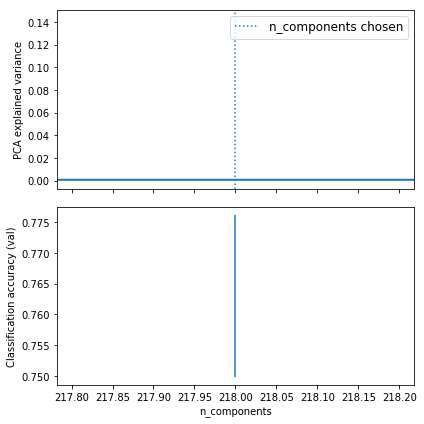

CPU times: user 27.3 s, sys: 905 ms, total: 28.2 s
Wall time: 14.3 s


In [9]:
%%time



transformer = FunctionTransformer(np.log, validate=True)

scl = StandardScaler()

logistic = SGDClassifier(loss='modified_huber', max_iter=10000, tol=np.exp(-5), random_state=0)

pca = PCA()
pipe = Pipeline(steps=[('standardize', scl), ('logarithm', transformer), 
                       ('pca', pca), ('logistic', logistic)])

# After having run a larger search: 
'''Best Parameter (CV score=0.765):
{'logistic__alpha': 0.15848931924611143, 'logistic__loss': 'modified_huber', 'logistic__penalty': 'l2', 'pca__n_components': 218}
CPU times: user 44min 51s, sys: 1min 46s, total: 46min 37s
Wall time: 23min 30s

'''
pcan = 218
l_alpha = 0.15848931924611143

param_grid = {
    'pca__n_components': [pcan]#np.arange(b,NCm, a**b),
    'logistic__alpha': [l_alpha] #np.logspace(-b**b, b**b, a),
    'logistic__loss': ['modified_huber', 'log'], 
    'logistic__penalty': ['l2', 'l1']
}

search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)

search.fit(X, y)

print('Best Parameter (CV score=%0.3f):' % search.best_score_)
print(search.best_params_)

#Plot the PCA spectrum
pca.fit(X)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

print(pca.explained_variance_ratio_)


ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()


In [37]:
pcan = 218
l_alpha = 0.15848931924611143

transformer = FunctionTransformer(np.log1p, validate=True)
scl = StandardScaler(with_std=False)
logistic = SGDClassifier(alpha=l_alpha, max_iter=10000, tol=np.exp(-5), random_state=0,
                         loss='modified_huber', penalty='l2')
pca = PCA(n_components=pcan)

pipe = Pipeline(steps=[('standardize', scl), ('logarithm', transformer), 
                       ('pca', pca), ('logistic', logistic)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict_proba(X_test)

#scores = cross_val_score(pipe, X_train, y_train, cv=8, scoring='neg_log_loss') 

-scores.mean()

#log_loss(y_test, y_pred)

0.5473348321898355

In [29]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log, validate=True)

scl = StandardScaler()

X.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
'''>>> import numpy as np
>>> from sklearn.preprocessing import FunctionTransformer
>>> transformer = FunctionTransformer(np.log1p, validate=True)
>>> X = np.array([[0, 1], [2, 3]])
>>> transformer.transform(X)
array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])'''

In [30]:
#np.logaddexp(np.arange(1,12)) - np.logaddexp(np.arange(1,12))


ValueError: invalid number of arguments